In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('./data/mental_health_workplace_survey.csv')
df[["BurnoutLevel", "BurnoutRisk"]].head(20)

,BurnoutLevel,BurnoutRisk
0,3.37,0
1,7.39,1
2,7.10,1
3,4.18,0
4,8.28,1
5,3.12,0
6,5.15,0
7,5.25,0
8,4.07,0
9,9.59,1


# EDA
4. Dataset Shape & Info

In [3]:
print("Shape of data:", df.shape)
df.info()

Shape of data: (3000, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   EmployeeID              3000 non-null   int64  
 1   Age                     3000 non-null   int64  
 2   Gender                  3000 non-null   object 
 3   Country                 3000 non-null   object 
 4   JobRole                 3000 non-null   object 
 5   Department              3000 non-null   object 
 6   YearsAtCompany          3000 non-null   int64  
 7   WorkHoursPerWeek        3000 non-null   int64  
 8   RemoteWork              3000 non-null   object 
 9   BurnoutLevel            3000 non-null   float64
 10  JobSatisfaction         3000 non-null   float64
 11  StressLevel             3000 non-null   float64
 12  ProductivityScore       3000 non-null   float64
 13  SleepHours              3000 non-null   float64
 14  PhysicalActivi

5. Missing Values

In [4]:
df.isnull().sum()

EmployeeID                0
Age                       0
Gender                    0
Country                   0
JobRole                   0
Department                0
YearsAtCompany            0
WorkHoursPerWeek          0
RemoteWork                0
BurnoutLevel              0
JobSatisfaction           0
StressLevel               0
ProductivityScore         0
SleepHours                0
PhysicalActivityHrs       0
CommuteTime               0
HasMentalHealthSupport    0
ManagerSupportScore       0
HasTherapyAccess          0
MentalHealthDaysOff       0
SalaryRange               0
WorkLifeBalanceScore      0
TeamSize                  0
CareerGrowthScore         0
BurnoutRisk               0
dtype: int64

Missing values:
 Series([], dtype: int64)


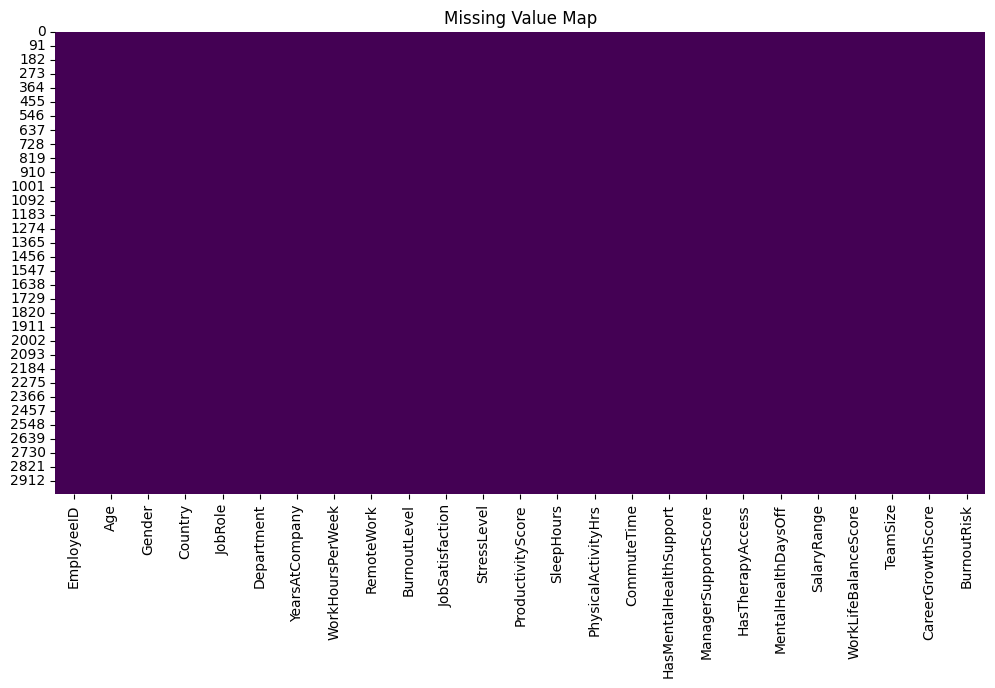

In [5]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Missing values:\n", missing)

# Visual
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Map")
plt.show()

6. Categorical & Numerical Column Split

In [6]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(exclude='object').columns.tolist()
print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['Gender', 'Country', 'JobRole', 'Department', 'RemoteWork', 'HasMentalHealthSupport', 'HasTherapyAccess', 'SalaryRange']
Numerical Columns: ['EmployeeID', 'Age', 'YearsAtCompany', 'WorkHoursPerWeek', 'BurnoutLevel', 'JobSatisfaction', 'StressLevel', 'ProductivityScore', 'SleepHours', 'PhysicalActivityHrs', 'CommuteTime', 'ManagerSupportScore', 'MentalHealthDaysOff', 'WorkLifeBalanceScore', 'TeamSize', 'CareerGrowthScore', 'BurnoutRisk']


7. Categorical column

In [7]:
for i in categorical_cols:
    print(i)

Gender
Country
JobRole
Department
RemoteWork
HasMentalHealthSupport
HasTherapyAccess
SalaryRange


8. numerical column

In [8]:
for i in numerical_cols:
    print(i)

EmployeeID
Age
YearsAtCompany
WorkHoursPerWeek
BurnoutLevel
JobSatisfaction
StressLevel
ProductivityScore
SleepHours
PhysicalActivityHrs
CommuteTime
ManagerSupportScore
MentalHealthDaysOff
WorkLifeBalanceScore
TeamSize
CareerGrowthScore
BurnoutRisk


9. Univariate Analysis

In [9]:
df[numerical_cols].describe()

,EmployeeID,Age,YearsAtCompany,WorkHoursPerWeek,BurnoutLevel,JobSatisfaction,StressLevel,ProductivityScore,SleepHours,PhysicalActivityHrs,CommuteTime,ManagerSupportScore,MentalHealthDaysOff,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.00000,3000.00000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000
mean,2500.500000,40.805667,10.099333,44.504000,5.509137,5.43750,5.51535,5.51956,6.539000,5.030400,59.227000,5.44254,4.544667,5.450950,25.20100,5.520680,0.326667
std,866.169729,11.011705,6.035032,8.491526,2.574072,2.59443,2.60361,2.60761,1.441876,2.861026,34.809779,2.59740,2.854129,2.602379,14.08645,2.566861,0.469072
min,1001.000000,22.000000,0.000000,30.000000,1.000000,1.00000,1.00000,1.00000,4.000000,0.000000,0.000000,1.00000,0.000000,1.000000,1.00000,1.000000,0.000000
25%,1750.750000,31.000000,5.000000,37.000000,3.300000,3.18000,3.26000,3.28000,5.300000,2.600000,29.000000,3.16000,2.000000,3.160000,13.00000,3.300000,0.000000
50%,2500.500000,41.000000,10.000000,45.000000,5.480000,5.43000,5.49500,5.49000,6.600000,5.000000,59.000000,5.44000,5.000000,5.425000,25.00000,5.580000,0.000000
75%,3250.250000,50.000000,15.000000,52.000000,7.640000,7.68000,7.82250,7.80250,7.800000,7.500000,90.000000,7.69000,7.000000,7.730000,37.00000,7.642500,1.000000
max,4000.000000,59.000000,20.000000,59.000000,10.000000,10.00000,10.00000,10.00000,9.000000,10.000000,119.000000,9.99000,9.000000,10.000000,49.00000,9.990000,1.000000


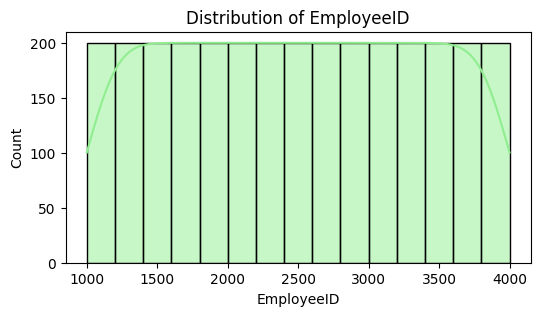

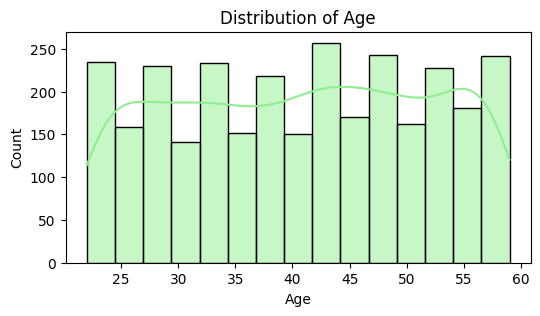

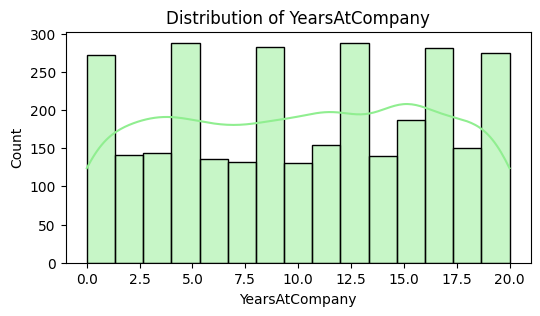

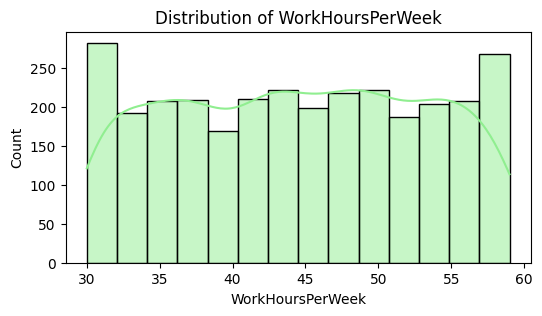

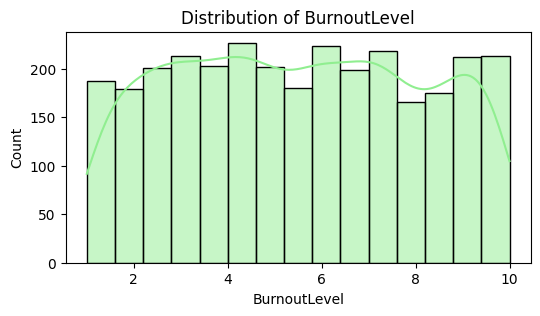

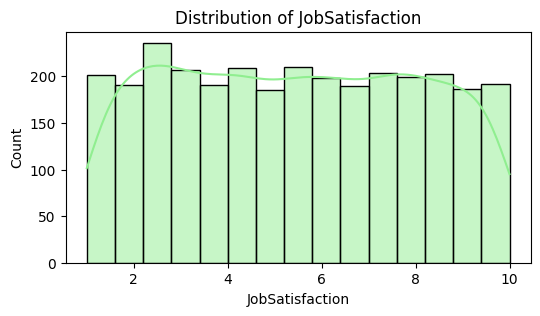

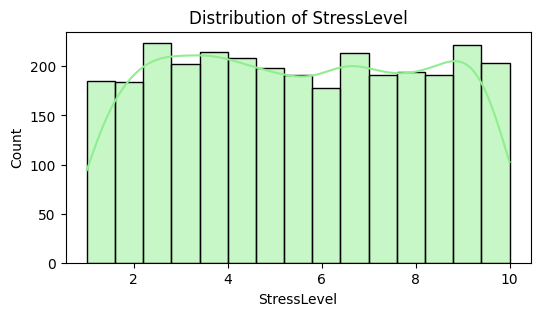

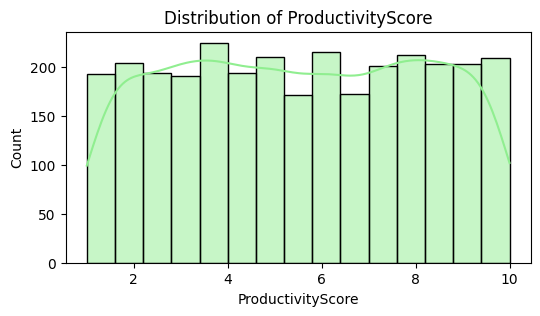

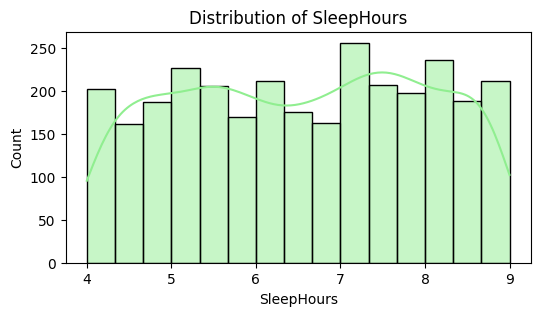

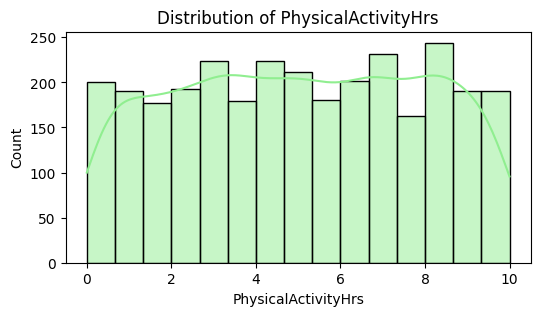

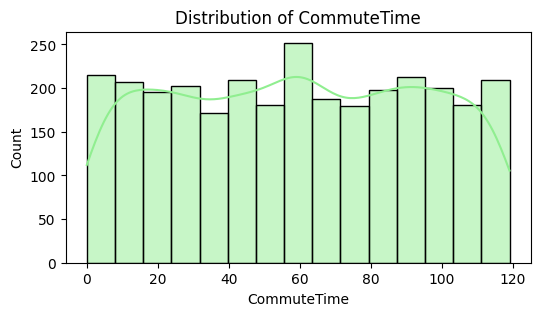

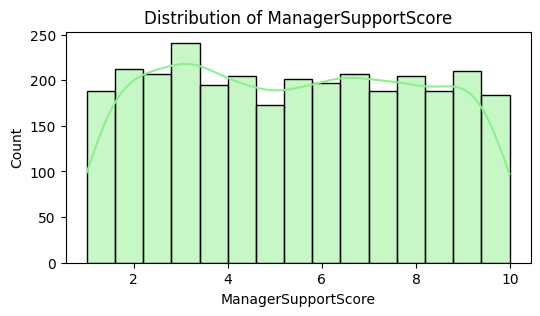

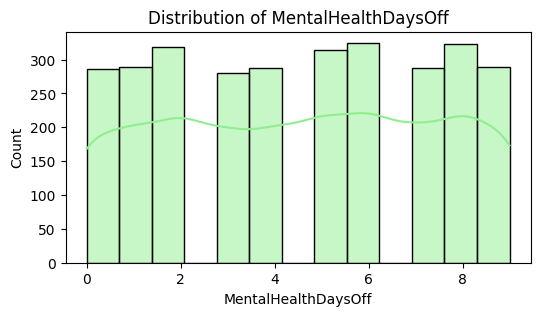

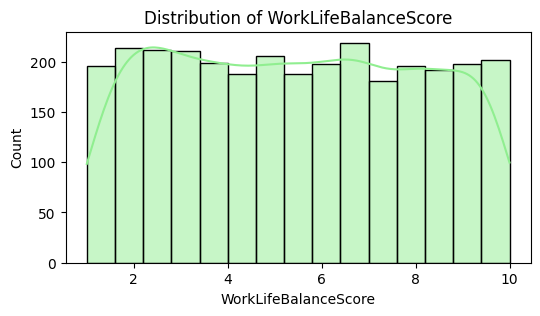

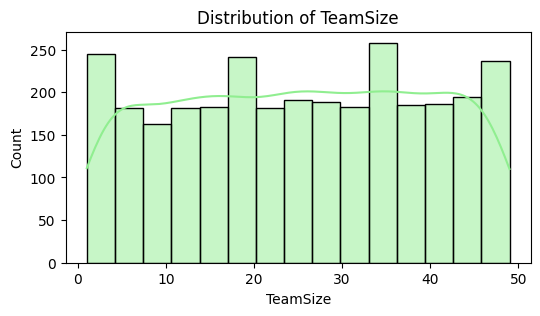

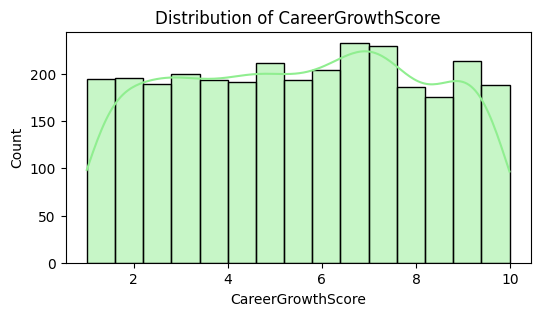

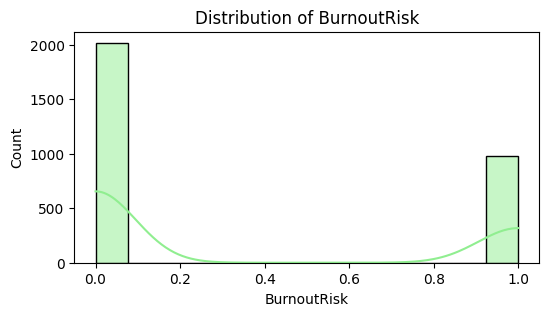

In [10]:
#Visual
for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True, color='lightgreen')
    plt.title(f"Distribution of {col}")
    plt.show()

<====================== Here is the counts  :======================>
Gender
Non-binary           757
Prefer not to say    757
Male                 752
Female               734
Name: count, dtype: int64


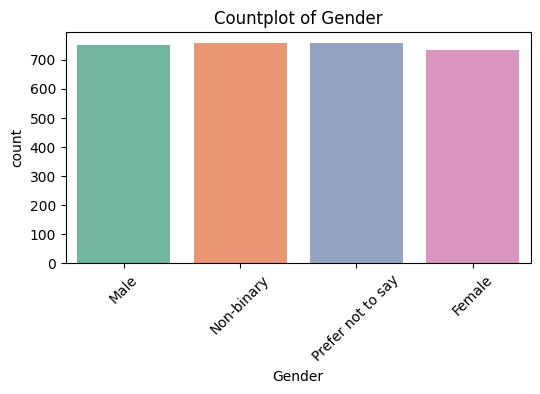

<====================== Here is the counts  :======================>
Country
India        464
Brazil       443
Canada       434
UK           427
Australia    418
USA          408
Germany      406
Name: count, dtype: int64


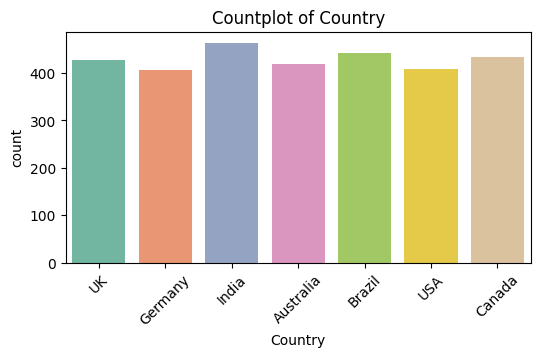

<====================== Here is the counts  :======================>
JobRole
Data Scientist       411
Software Engineer    401
Customer Support     380
Marketing Manager    372
Project Manager      362
HR Specialist        361
IT Admin             358
Sales Associate      355
Name: count, dtype: int64


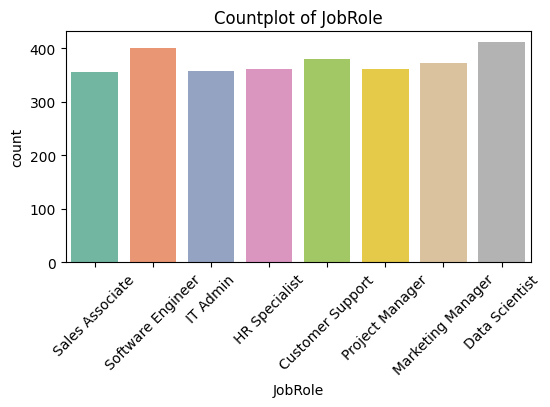

<====================== Here is the counts  :======================>
Department
HR             525
Sales          522
Marketing      521
Engineering    488
IT             482
Support        462
Name: count, dtype: int64


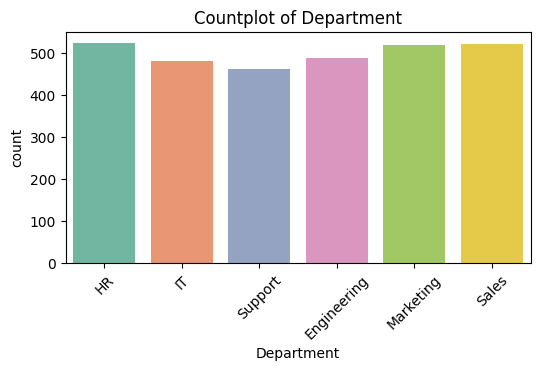

<====================== Here is the counts  :======================>
RemoteWork
Hybrid    1022
No         990
Yes        988
Name: count, dtype: int64


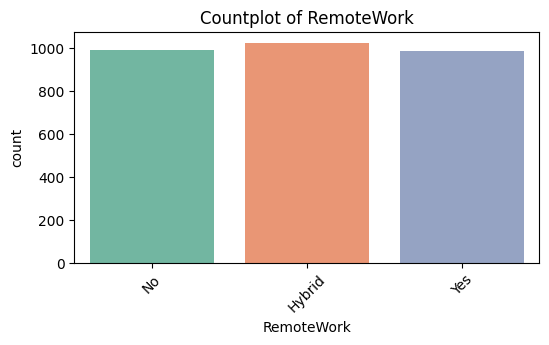

<====================== Here is the counts  :======================>
HasMentalHealthSupport
No     1531
Yes    1469
Name: count, dtype: int64


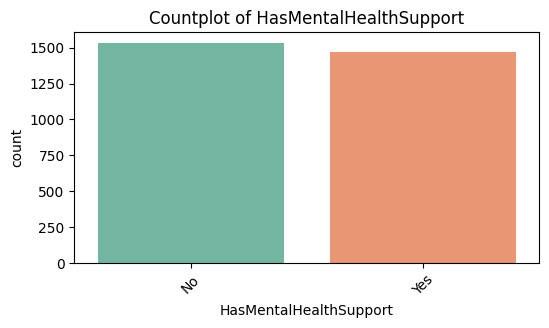

<====================== Here is the counts  :======================>
HasTherapyAccess
No     1511
Yes    1489
Name: count, dtype: int64


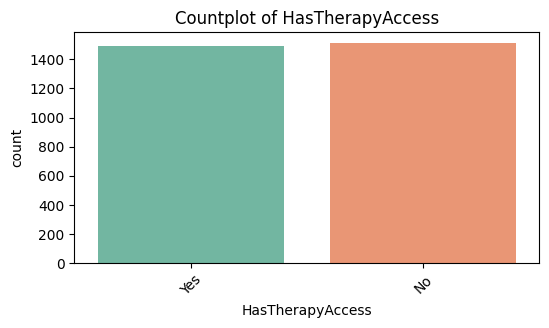

<====================== Here is the counts  :======================>
SalaryRange
100K+       640
80K-100K    600
<40K        594
40K-60K     593
60K-80K     573
Name: count, dtype: int64


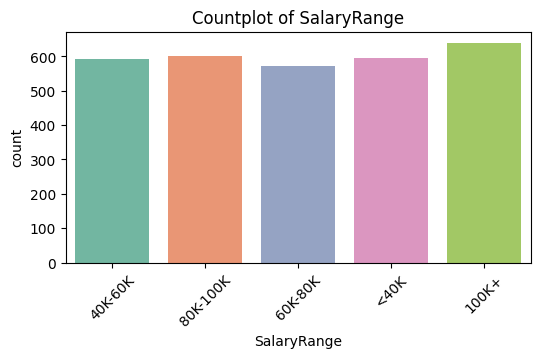

In [11]:
# Categorical
for col in categorical_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=df, x=col, palette='Set2')
    plt.xticks(rotation=45)
    plt.title(f"Countplot of {col}")
    print("<====================== Here is the counts  :======================>")
    print(df[col].value_counts())
    plt.show()

10. Bivariate Analysis

BurnoutRisk vs numerical

<===============================================================================>




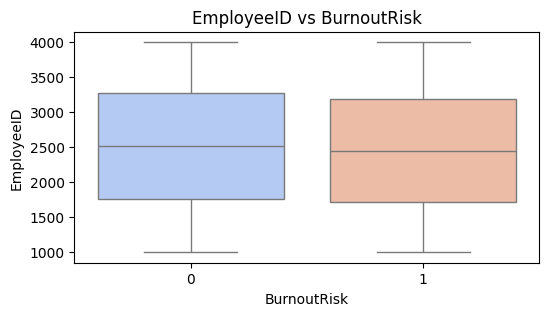

<===============================================================================>




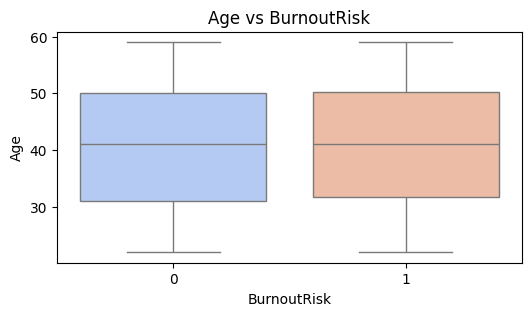

<===============================================================================>




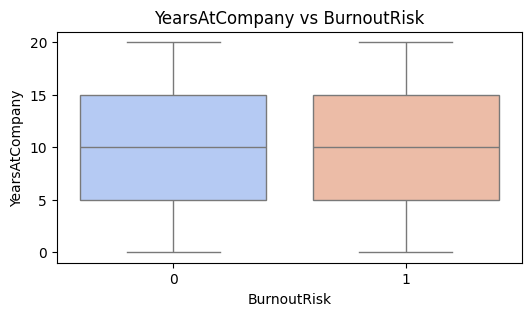

<===============================================================================>




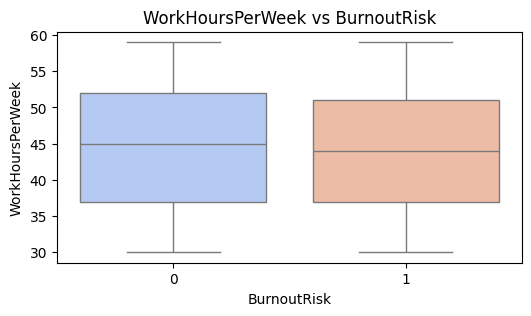

<===============================================================================>




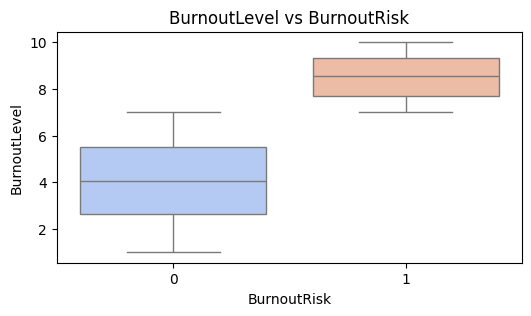

<===============================================================================>




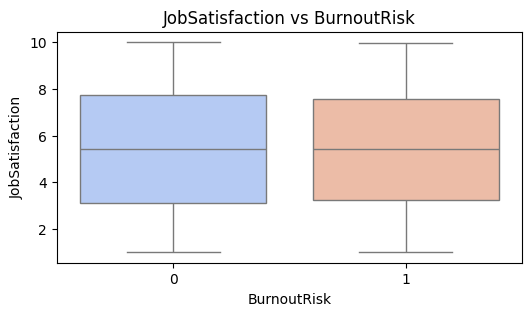

<===============================================================================>




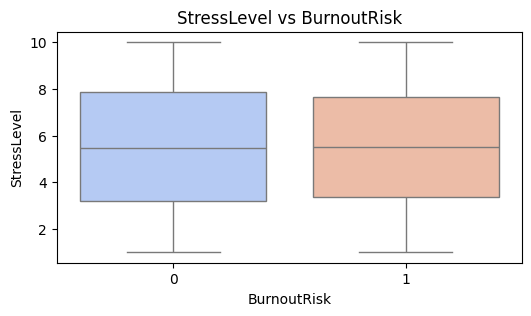

<===============================================================================>




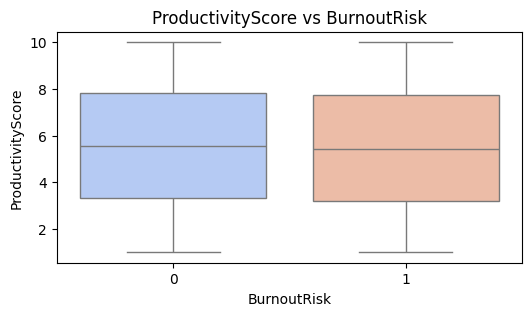

<===============================================================================>




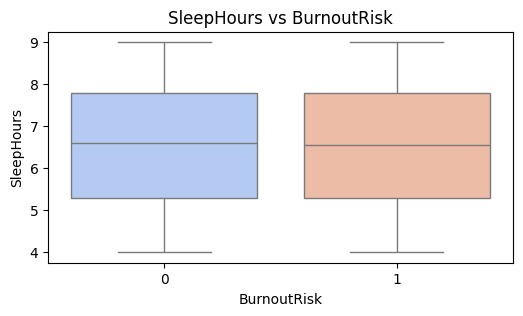

<===============================================================================>




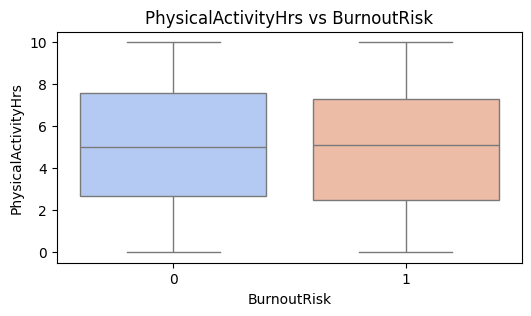

<===============================================================================>




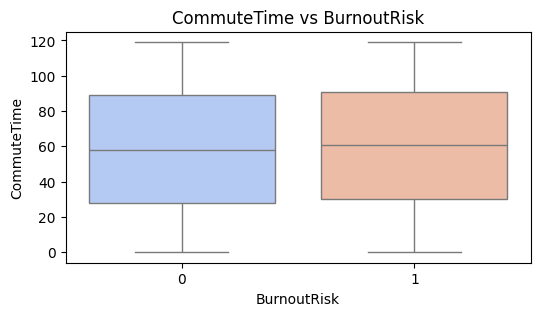

<===============================================================================>




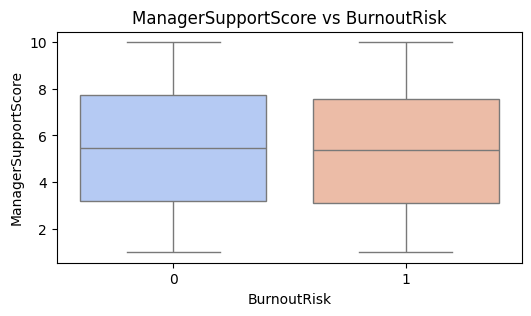

<===============================================================================>




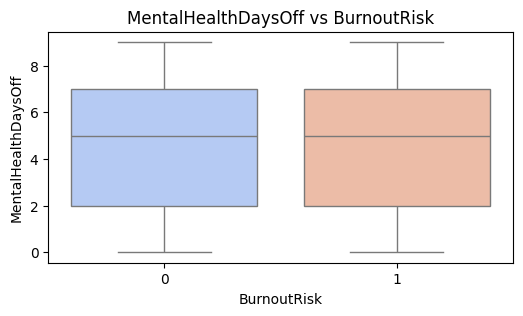

<===============================================================================>




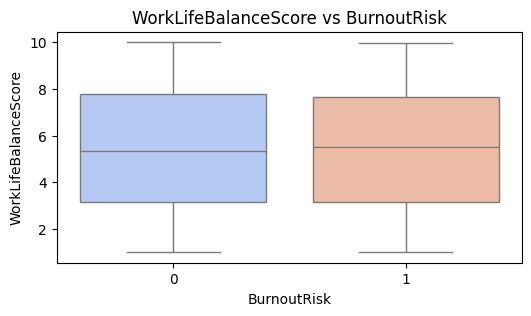

<===============================================================================>




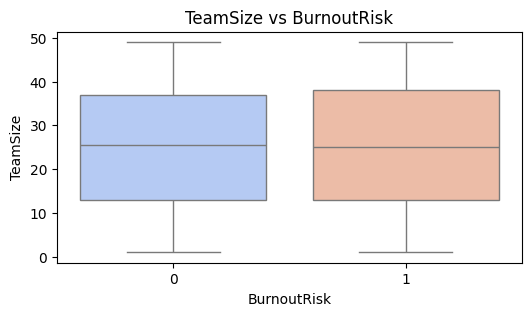

<===============================================================================>




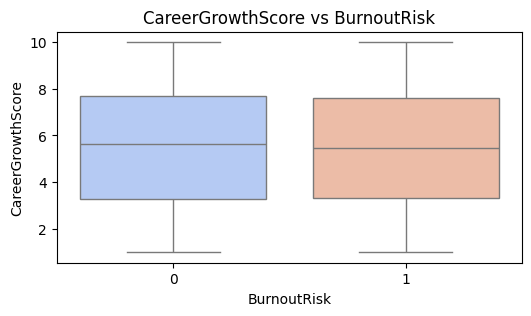

<===============================================================================>




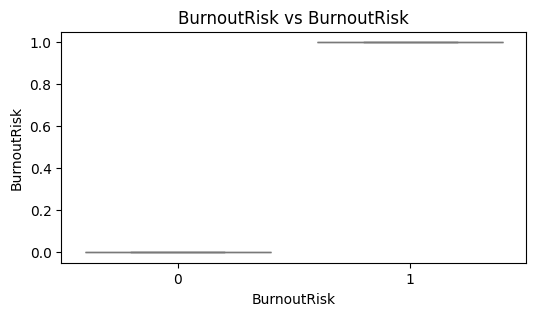

In [12]:
for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=df, x='BurnoutRisk', y=col, palette='coolwarm')
    plt.title(f"{col} vs BurnoutRisk")
    print("<===============================================================================>")
    print("\n")
    plt.show()

10.2 BurnoutRisk vs categorical

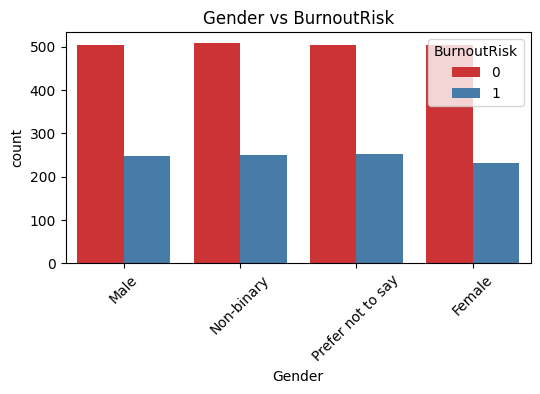

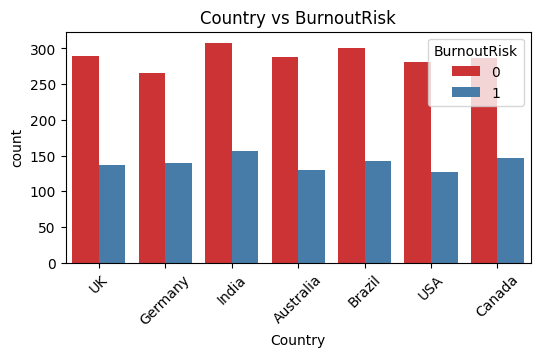

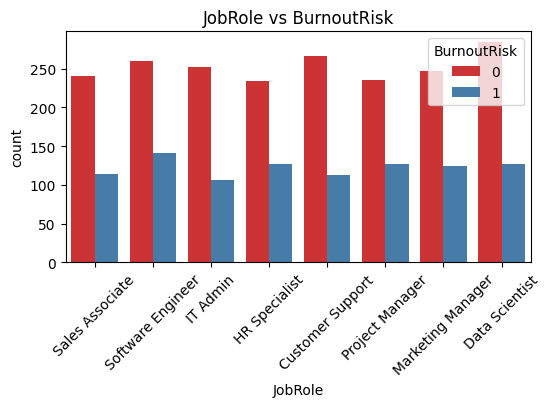

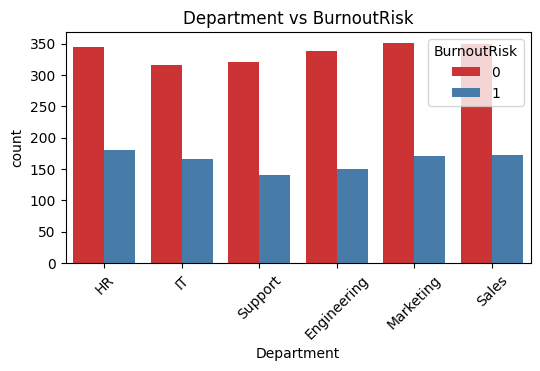

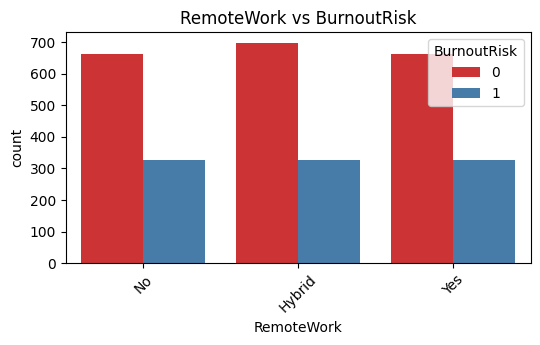

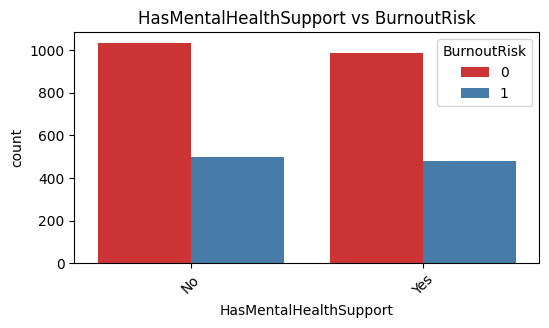

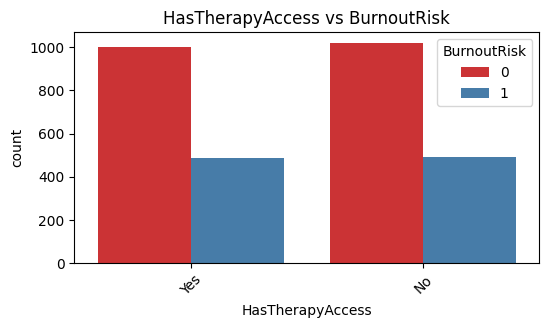

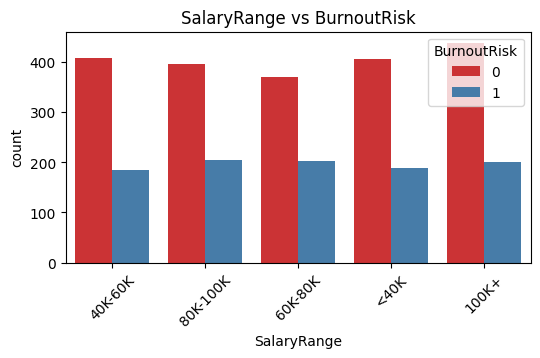

In [13]:
for col in categorical_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=df, x=col, hue='BurnoutRisk', palette='Set1')
    plt.xticks(rotation=45)
    plt.title(f"{col} vs BurnoutRisk")
    plt.show()

11. Correlation Matrix

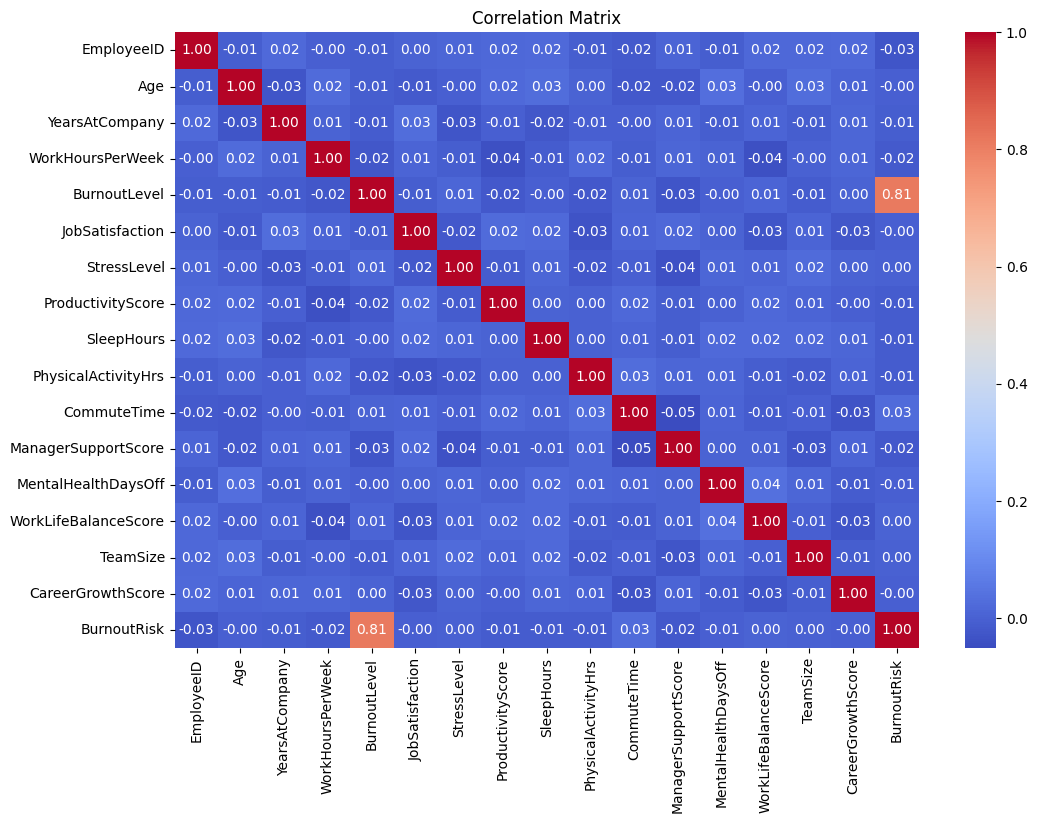

In [14]:
plt.figure(figsize=(12, 8))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

12. Encode categorical features

In [15]:
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

In [16]:
# Features and Target
#X = df.drop("BurnoutRisk", axis=1)
X = df.drop(["BurnoutRisk", "BurnoutLevel"], axis=1)
y = df["BurnoutRisk"]


13. Train-test split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [18]:
X_train.columns

Index(['EmployeeID', 'Age', 'Gender', 'Country', 'JobRole', 'Department',
       'YearsAtCompany', 'WorkHoursPerWeek', 'RemoteWork', 'JobSatisfaction',
       'StressLevel', 'ProductivityScore', 'SleepHours', 'PhysicalActivityHrs',
       'CommuteTime', 'HasMentalHealthSupport', 'ManagerSupportScore',
       'HasTherapyAccess', 'MentalHealthDaysOff', 'SalaryRange',
       'WorkLifeBalanceScore', 'TeamSize', 'CareerGrowthScore'],
      dtype='object')

14. Standardization

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

15. Models

In [20]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [21]:
from xgboost import XGBClassifier
models = {
    # "Logistic Regression": LogisticRegression(),
    # "Random Forest": RandomForestClassifier(),
    # "Naive Bayes": GaussianNB(),
    # "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42),

    "Random Forest": RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=3,
    max_features="sqrt",
    class_weight='balanced',
    random_state=42
),
"XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42),

"Logistic Regression": LogisticRegression(
    solver="saga",
    penalty="l2",
    C=0.1,
    class_weight=None,
    max_iter=2000,
    random_state=42
),
  "Naive Bayes": GaussianNB(var_smoothing=1e-9)

}

16. Model function

In [22]:
def evaluate_model(model, model_name):
    print(f"\nTraining {model_name}")
    fold_accuracies = []
    test_preds = np.zeros((test.shape[0], len(np.unique(y))))

    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model.fit(X_train, y_train)
        val_preds = model.predict(X_val)
        acc = accuracy_score(y_val, val_preds)
        print(f"Fold {fold + 1} Accuracy: {acc:.4f}")
        fold_accuracies.append(acc)

        test_preds += model.predict_proba(test) / skf.n_splits

    mean_acc = np.mean(fold_accuracies)
    print(f"Average Accuracy for {model_name}: {mean_acc:.4f}")
    return mean_acc, np.argmax(test_preds, axis=1)

 Running CV for: Random Forest
 Skipping SHAP for Random Forest this fold: name 'shap_values' is not defined
 Skipping SHAP for Random Forest this fold: name 'shap_values' is not defined
 Skipping SHAP for Random Forest this fold: name 'shap_values' is not defined
 Skipping SHAP for Random Forest this fold: name 'shap_values' is not defined
 Skipping SHAP for Random Forest this fold: name 'shap_values' is not defined
 Skipping SHAP for Random Forest this fold: name 'shap_values' is not defined
 Skipping SHAP for Random Forest this fold: name 'shap_values' is not defined
 Skipping SHAP for Random Forest this fold: name 'shap_values' is not defined
 Skipping SHAP for Random Forest this fold: name 'shap_values' is not defined
 Skipping SHAP for Random Forest this fold: name 'shap_values' is not defined
 Running CV for: XGBoost


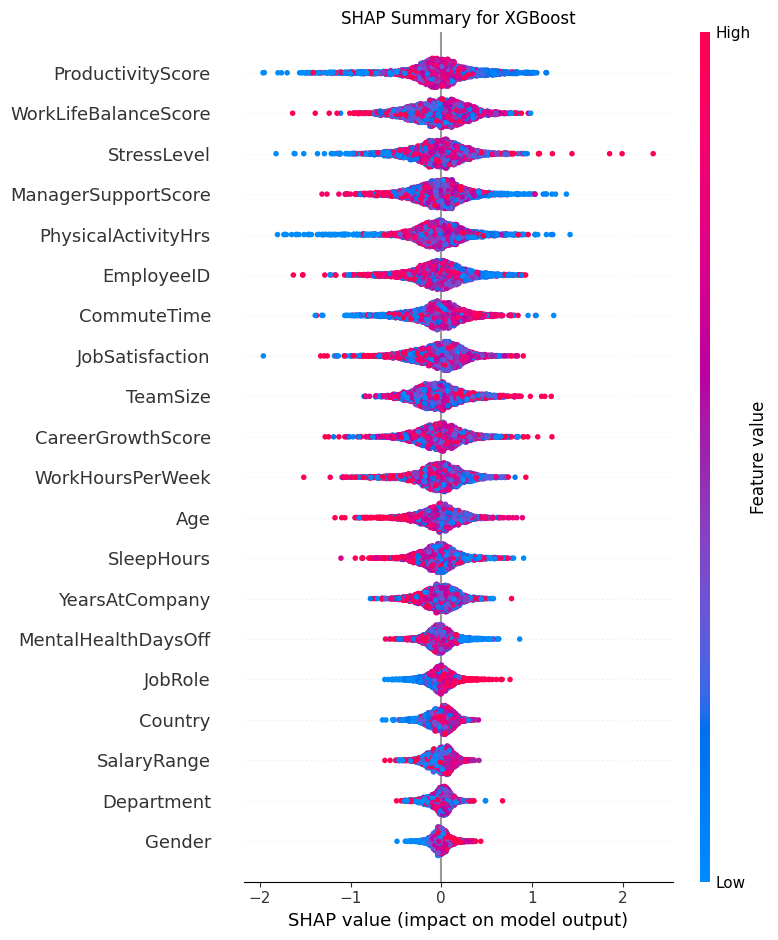

 Running CV for: Logistic Regression


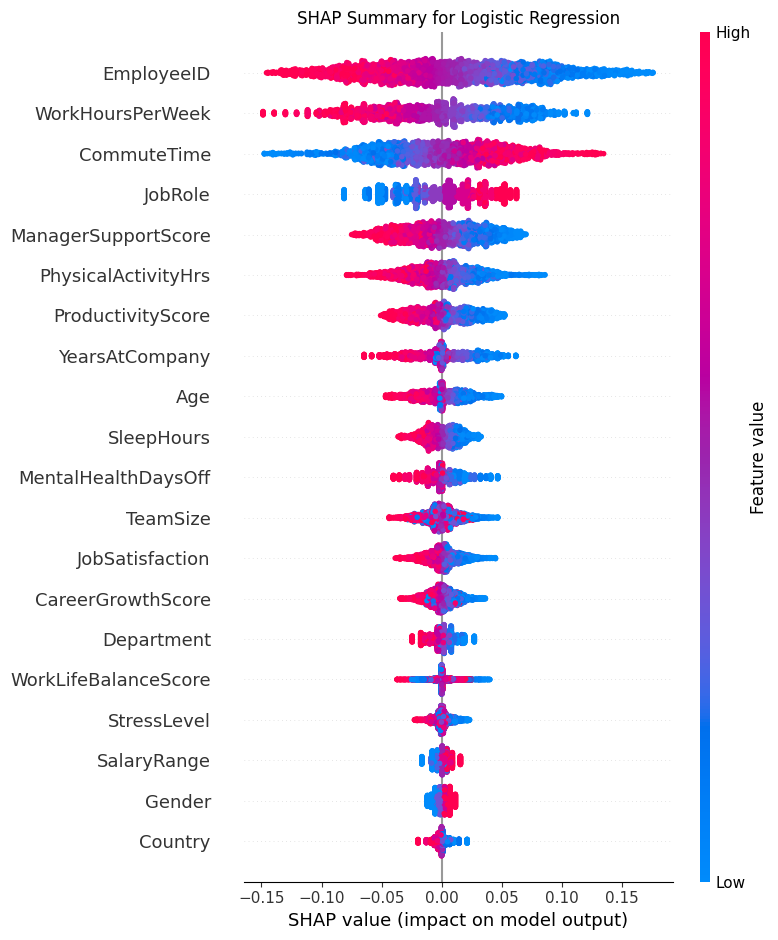

 Running CV for: Naive Bayes


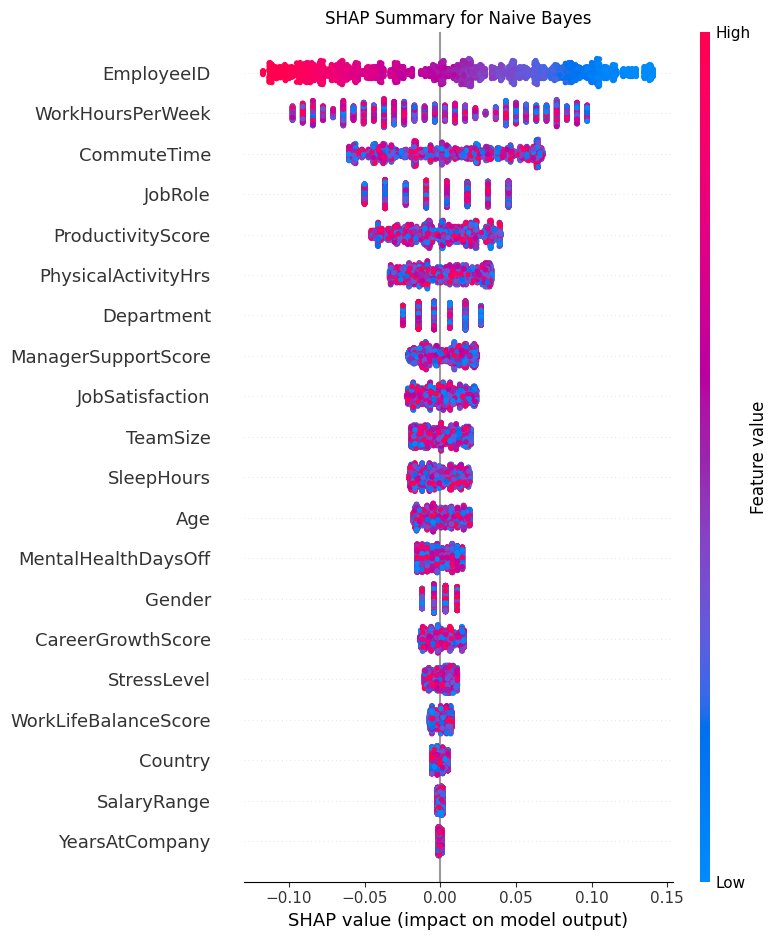

                 Model  Mean Accuracy  Std Accuracy  Mean Precision  \
0        Random Forest       0.634667  1.641138e-02        0.490451   
1              XGBoost       0.624000  1.143095e-02        0.506783   
2  Logistic Regression       0.673333  1.110223e-16        0.336667   
3          Naive Bayes       0.673333  1.110223e-16        0.336667   

   Mean Recall   Mean F1  
0     0.496767  0.457909  
1     0.506971  0.487882  
2     0.500000  0.402390  
3     0.500000  0.402390  

Confusion Matrix for Random Forest:
[[1807  213]
 [ 883   97]]

Confusion Matrix for XGBoost:
[[1706  314]
 [ 814  166]]

Confusion Matrix for Logistic Regression:
[[2020    0]
 [ 980    0]]

Confusion Matrix for Naive Bayes:
[[2020    0]
 [ 980    0]]


In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

results = []
conf_matrices = {}

for name, model in models.items():
    print(f" Running CV for: {name}")

    accuracies, precisions, recalls, f1s = [], [], [], []
    cms = []

    shap_values_all = []
    shap_X_all = []

    for train_idx, test_idx in cv.split(X, y):   
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Metrics
        accuracies.append(accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred, average="macro"))
        recalls.append(recall_score(y_test, y_pred, average="macro"))
        f1s.append(f1_score(y_test, y_pred, average="macro"))

        # Confusion matrix
        cms.append(confusion_matrix(y_test, y_pred))

        # --- SHAP analysis (choose explainer type) ---
        try:
            if isinstance(model, (XGBClassifier)):
                explainer = shap.TreeExplainer(model)
                shap_values = explainer.shap_values(X_test)
            elif isinstance(model, LogisticRegression):
                explainer = shap.LinearExplainer(model, X_train, feature_perturbation="interventional")
                shap_values = explainer.shap_values(X_test)
            #else:
            #   raise ValueError("SHAP not configured for this model type.")

            shap_values_all.append(shap_values)
            shap_X_all.append(X_test)

        except Exception as e:
            print(f" Skipping SHAP for {name} this fold: {e}")

    # Save aggregated metrics
    results.append({
        'Model': name,
        'Mean Accuracy': np.mean(accuracies),
        'Std Accuracy': np.std(accuracies),
        'Mean Precision': np.mean(precisions),
        'Mean Recall': np.mean(recalls),
        'Mean F1': np.mean(f1s)
    })

    # Store summed confusion matrix (all folds)
    conf_matrices[name] = sum(cms)

    # --- Plot SHAP summary if available ---
    if len(shap_values_all) > 0:
        try:
            all_shap_values = np.vstack(shap_values_all)
            all_X = pd.concat(shap_X_all)

            plt.title(f"SHAP Summary for {name}")
            shap.summary_plot(all_shap_values, all_X, show=True)
        except Exception as e:
            print(f"⚠️ Could not plot SHAP summary for {name}: {e}")

# Results table
results_df = pd.DataFrame(results)
print(results_df)

# Confusion matrices
for name, cm in conf_matrices.items():
    print(f"\nConfusion Matrix for {name}:\n{cm}")


17. Convert to DataFrame and show

In [24]:
df_results = pd.DataFrame(results).sort_values(by='Mean Accuracy', ascending=False)
print("\n📊 K-Fold CV Results:")
print(df_results)


📊 K-Fold CV Results:
                 Model  Mean Accuracy  Std Accuracy  Mean Precision  \
2  Logistic Regression       0.673333  1.110223e-16        0.336667   
3          Naive Bayes       0.673333  1.110223e-16        0.336667   
0        Random Forest       0.634667  1.641138e-02        0.490451   
1              XGBoost       0.624000  1.143095e-02        0.506783   

   Mean Recall   Mean F1  
2     0.500000  0.402390  
3     0.500000  0.402390  
0     0.496767  0.457909  
1     0.506971  0.487882  


18. Ploting graph

In [36]:
df_results["Mean Accuracy"]=df_results["Mean Accuracy"]*100

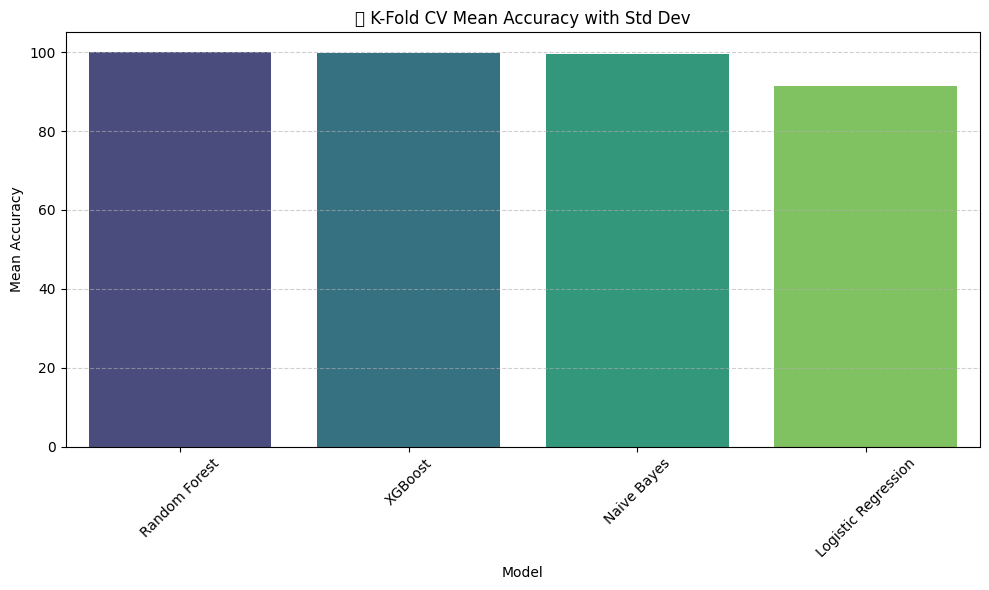

In [37]:
# Sort for cleaner plot (optional)
df_results.sort_values("Mean Accuracy", ascending=False, inplace=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Model',
    y='Mean Accuracy',
    data=df_results,
    # yerr=df_results['Std Dev'],
    palette='viridis',
    capsize=0.2
)

# Customize
plt.title("📊 K-Fold CV Mean Accuracy with Std Dev")
plt.ylabel("Mean Accuracy")
# plt.ylim(0.45, 0.52)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

✅ Conclusion
Through this analysis, we uncovered how factors like excessive work hours, low sleep, poor support systems, and high stress significantly correlate with higher burnout risk.

This dataset sheds light on mental health in today’s work culture — and how we can build healthier, more supportive environments.